In [1]:
import os
import numpy as np
import math
import re
import matplotlib.pyplot as plt


In [2]:
base_path = 'FileTXTMyomes2023/G3'
file_path = os.path.join(base_path,'AXONAL','Pasien14_LC_G3_A.txt')

In [3]:
emg_signal = []
file1 = open(file_path, 'r', encoding='iso-8859-1')
lines = file1.readlines()
counter = 1
for line in lines:

    tmp = line.replace("\n","")
    tmp = re.findall(r"[-+]?\d*\.\d+|\d+", tmp)

    if len(tmp) == 1:
        tmp = tmp[0]
        emg_signal.append(tmp)

emg_data = np.array(emg_signal).astype(np.float32)


In [4]:

# Assuming you have preprocessed EMG data stored in a variable called 'emg_data'
# Assuming you have a desired window size and overlap percentage

window_size = 200  # Window size for segmentation (assuming 200 samples per window)
overlap = 0.5      # Overlap percentage (0.5 means 50% overlap between consecutive windows)

# Calculate the overlap size based on the window size and overlap percentage
overlap_size = int(window_size * overlap)

# Calculate the total number of segments based on the window size and overlap
num_segments = (len(emg_data) - window_size) // overlap_size + 1

# Initialize an empty list to store the segmented EMG data
segments = []

# Segment the EMG data
for i in range(num_segments):
    # Calculate the start and end indices for the current segment
    start_index = i * overlap_size
    end_index = start_index + window_size
    
    # Extract the segment from the EMG data
    segment = emg_data[start_index:end_index]
    
    # Append the segment to the list of segments
    segments.append(segment)

# Convert the list of segments to a numpy array
segments = np.array(segments)

print(segments)

[[ 69.  80.  89. ...  68.  77.  86.]
 [ 17.  16.  15. ...  17.  16.  14.]
 [ 95. 100. 100. ...  13.  17.  24.]
 ...
 [ 17.  17.  17. ...  45.  40.  36.]
 [ 41.  51.  61. ...  13.  13.  13.]
 [ 32.  29.  26. ...  93.  85.  78.]]


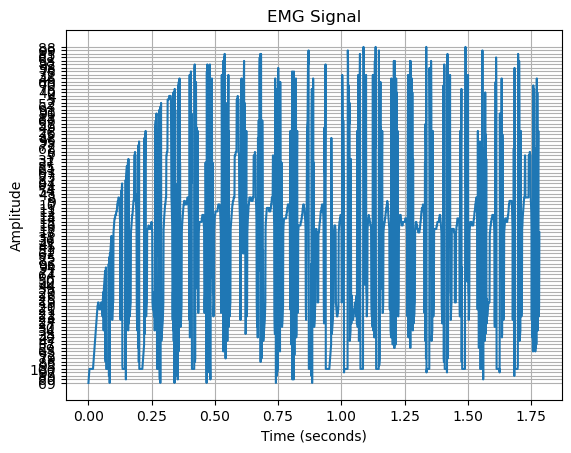

In [8]:
sampling_rate = 1000  # Sample rate of the EMG signal in Hz
duration = len(emg_signal) / sampling_rate
time = np.linspace(0, duration, len(emg_signal))

# Plot the EMG signal
plt.figure()
plt.plot(time, emg_signal)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('EMG Signal')
plt.grid(True)
plt.show()